# Living small in the city or large in the 'burbs?
## Exploring Salt Lake City's real estate prices to address the eternal question
#### Katherine Chandler, K2 Exploratory Data Analysis

In [1]:
import pandas as pd
import urllib.parse
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import preprocessing

## Background
I am a proponent of smaller homes, and recent anecdotal observations (and meandering dinner discussions) have made me curious about the relationship between the size of a home and its relative appreciation in value. My vocal family members maintain (with fist raised) 'You're better off owning a tiny home downtown than a mansion in the **'burbs**!!!'. Indeed, current hipster cannon asserts that bigger is *not* better when it comes to housing. While the merits of a modestly sized home go beyond the economic, I was curious about how the 'small-home' movement holds up to economic reality. Is a small urban home *really* a better investment than a large suburban home? I recently moved back to my hometown of Salt Lake City, and in an entirely self-serving selection process I elected to address this question using current and historical real estate prices in the Salt Lake City area.

## Questions for Exploration

I broke high level question into three discrete sub-questions:

* Are small homes more valuable (per square foot) than large homes?
* Is a small home downtown really more valuable than a large home in the 'burbs?
* Has the relative value of small urban homes increased more than that of large suburban homes?

## Data Sources

I found that many real estate services (like the local multiple listing service) obfuscate their HTML to hinder web scraping, and few real estate services provide free APIs. Because of these limitations, all of my data came from one source: the tried and true real estate marketplace Zillow. Zillow served as a great resource for both historical and current real estate data in the Salt Lake City area. 

#### Active Listing Data

Zillow maintains 9 different APIs, but these APIs require a call be made on an individual street address (rather than a bulk call like city or ZIP code). In order to generate comprehensive data on current active listings, I modified the [```scrapehero zillow.py```](https://gist.github.com/scrapehero/5f51f344d68cf2c022eb2d23a2f1cf95 "scrapehero") script to generate a csv file containing the listing features of all active listings for 27 unique Salt Lake City ZIP codes. The modified scraping script (```zillow.py```), the script to call the scraping script (```zillow_scraper_calls.py```), ZIP code list, and resulting csv listing file can be found in the ```'zillow_scraper'``` folder of this repository.

The scraped data set includes 841 unique listings containing information about listing type ('title'), address, city, state, ZIP code ('postal_code'), listed sale price (in USD), size (in square feet), bedroom/bathroom count, and the active listing URL.

#### Historical Housing Price Data

To obtain historical real estate prices, I used the 'Home Values' data sets provided in the [Zillow Research Data sets](https://www.zillow.com/research/data/ "Zillow Research Data") (downloaded data sets in the ```'zillow_research_home_values'``` folder of this repository). The 'Home Values' data sets are smoothed, seasonally adjusted aggregates of estimated real estate value cut by location (city, state, metro area) and a given housing type (single family, number of bedrooms, etc.). Estimated real estate value is measured as the Zillow Home Value Index (ZHVI), a home price index (in USD) computed based on proprietary statistical and machine learning models ([ZHVI methodology here](https://www.zillow.com/research/zhvi-methodology-6032/ "ZHVI methodology")). No Zillow research data set provides direct information about home square footage (size), so I used bedroom count as a size proxy for this section of the project. The ZHVI time series contains monthly data for the period from April 1996 to February 2018.

## Cleaning the Data

#### Active Listing Data

The full cleaning code and logic for the active listing data can be found in the 'Zillow_SLC_Current_Active_Listings' notebook in the 'analysis_notebooks' of this repository. In short, the price data was parsed and standardized; the unique listing 'zpid' (Zillow property identifier) was extracted from the URL link and saved as the data frame index; redundant and non-consistent city naming conventions were standardized; and the combined 'facts and features' field was parsed into discrete square footage and bed/bath counts.

I also generated several new features in the data: price per square foot (USD/sqft), 'neighborhood' (a granular geographic clustering of zip codes), 'region' (a broad geographic clustering of zip codes), and a size_type category. 'Small' is classified as less than 1200 sqft, 'medium' as 1200- 2400 sqft, and 'large' as greater than 2400 sqft. 

#### Historical Housing Price Data

The full pre-processing for the active listing data can be found in the 'Zillow_SLC_Historical_Data' notebook in the 'analysis_notebooks' of this repository. Since these data sets are published by Zillow, the data was relatively clean and data pre-processing mainly included filtering for housing types / ZIP codes of interest and assigning geographic categories ('neighborhood' and 'region').

## Exploring the Data

The cleaned and processed active listing data was saved to a csv file from the 'Zillow_SLC_Current_Active_Listings' processing notebook and imported for the analyses below. 

I started the analysis by getting a high level view of the real estate market in Salt Lake City. What neighborhoods are associated with the current active listings? What is the average size of a listed home in each neighborhood? What is the average price of a listed home in each neighborhood?

In [2]:
# importing the active listing data and reassigning 'zpid' as index

slc_active_listings = pd.read_csv('~/Desktop/K2_DataScience/K2_Project2/zillow_analysis_notebooks/zillow_slc_current_listings_processed.csv', 
                           sep=',')

slc_active_listings.set_index('zpid', inplace=True)

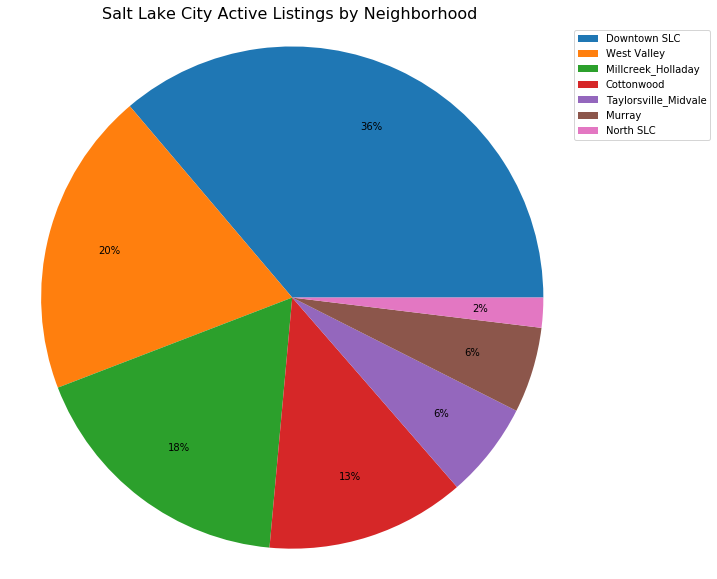

In [3]:
# make df with counts of neighborhood occurances

df= pd.DataFrame(data=slc_active_listings['neighborhood'].value_counts(), index=None).reset_index()
df.columns = ['neighborhood', 'listing_count']

# plot percentage of listings in each neighborhood

values = df['listing_count']
labels = df['neighborhood']

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
plt.pie(values,autopct='%1.0f%%', pctdistance=.75)
plt.legend(labels, bbox_to_anchor = [1, 1])
plt.title('Salt Lake City Active Listings by Neighborhood', y=1, fontsize=16)
plt.axis('equal')
plt.show()

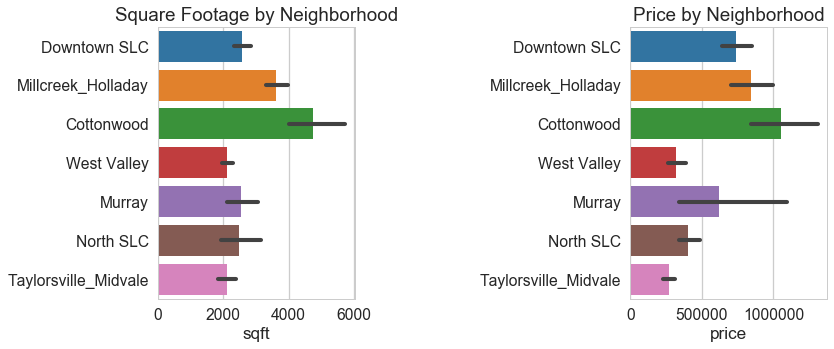

In [4]:
# plotting the sqft across west, east, and downtown neighborhoods

fig = plt.figure(figsize=[12, 5])
sns.set_context("talk", font_scale=1.2)
sns.set_style("whitegrid")

fig.add_subplot(131)   #left
sns.barplot(y="neighborhood", x="sqft", data=slc_active_listings).set_title('Square Footage by Neighborhood')
plt.ylabel("")


fig.add_subplot(133)   #right
sns.barplot(y="neighborhood", x="price", data=slc_active_listings).set_title('Price by Neighborhood')
plt.ylabel("")

plt.show()

In [5]:
# adjusting display options to show all summarized data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# summarizing active listing data
slc_active_listings.groupby('neighborhood').describe()

baths                                                 beds                                               postal_code                                                                         price                                                                                  price_per_sqft                                                                                        sqft                                                                     
                      count      mean       std  min  25%  50%  75%   max  count      mean       std  min  25%  50%  75%   max       count          mean        std      min      25%      50%       75%      max  count          mean           std       min       25%       50%         75%        max          count        mean         std         min         25%         50%         75%          max  count         mean          std     min      25%     50%      75%      max
neighborhood                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
Cottonwood             93.0  4.043011  2.488731  1.0  2.0  4.0  5.0  16.0   91.0  4.593407  1.556192  2.0  3.0  5.0  6.0   9.0       100.0  84121.000000   0.000000  84121.0  84121.0  84121.0  84121.00  84121.0  100.0  1.050594e+06  1.192152e+06  134000.0  418575.0  704000.0  1231250.00  9060000.0           93.0  244.010469  157.947518  125.468165  153.795452  174.302326  283.201669  1267.880364   93.0  4752.182796  4300.736868   432.0  2392.00  4380.0  5904.00  32463.0
Downtown SLC          265.0  2.642453  1.541024  1.0  2.0  2.0  3.0   9.0  267.0  3.235955  1.438115  1.0  2.0  3.0  4.0  10.0       282.0  84105.120567   3.992832  84101.0  84103.0  84103.0  84106.00  84115.0  282.0  7.386085e+05  9.269440e+05   90000.0  318625.0  422000.0   746500.00  7950000.0          268.0  263.163357  106.315455  127.186589  191.160595  236.821579  305.011267   868.902439  268.0  2586.462687  2111.071305   471.0  1303.25  1884.5  3029.00  14879.0
Millcreek_Holladay    124.0  3.370968  1.376148  1.0  3.0  3.0  4.0   9.0  124.0  3.983871  1.175522  1.0  3.0  4.0  5.0   7.0       138.0  84116.108696   5.762558  84109.0  84109.0  84117.0  84122.25  84124.0  138.0  8.398319e+05  8.764568e+05   15000.0  396225.0  599949.5   949675.00  5485000.0          124.0  206.145760   86.341206   16.666667  156.041428  191.474243  230.388912   623.295455  124.0  3607.322581  1942.759995   680.0  2348.25  3096.0  4733.75  12980.0
Murray                 38.0  2.894737  1.034264  1.0  2.0  3.0  4.0   5.0   39.0  3.794872  2.330343  1.0  3.0  3.0  4.0  16.0        43.0  84107.000000   0.000000  84107.0  84107.0  84107.0  84107.00  84107.0   43.0  6.224651e+05  1.471030e+06   15000.0  252950.0  354900.0   469500.00  9880000.0           39.0  159.552244   52.789336   22.796353  131.322115  162.878788  198.109217   270.925110   39.0  2542.256410  1612.540554   658.0  1321.00  2340.0  3069.50   8800.0
North SLC              13.0  2.846154  0.688737  2.0  2.0  3.0  3.0   4.0   13.0  3.615385  0.960769  2.0  3.0  4.0  4.0   6.0        15.0  84057.533333  42.242272  84010.0  84010.0  84054.0  84100.50  84114.0   15.0  3.998862e+05  1.531332e+05  295000.0  321950.0  347900.0   420449.50   899900.0           13.0  176.767081   42.442929  108.665475  139.157325  166.786448  213.768116   243.655914   13.0  2498.076923  1190.343890  1380.0  1920.00  2063.0  2602.00   5536.0
Taylorsville_Midvale   45.0  2.544444  1.075672  1.0  2.0  2.0  3.0   6.0   45.0  3.755556  1.246004  2.0  3.0  4.0  4.0   7.0        48.0  84125.875000   3.029114  84123.0  84123.0  84123.0  84129.00  84129.0   48.0  2.714623e+05

Of the current active listings with Salt Lake City ZIP codes, about 1/3 (36%) are downtown properties. Looking at a summary of the listing features shows some pretty big differences in size and list price by neighborhood. An 'average' Cottonwood home has 4.6 beds in hefty a 4750 sqft with a price-tag of \$1.05 million, while an 'average' home in West Valley is a more modest 3.6 beds in ~2100 sqft for just \$318,212.

This data highlights further regional geographic distinctions that can be made in the real estate listings. Suburban homes on Salt Lake City's east side (Cottonwood, Emigration Canyon, and Millcreek/Holladay) are large and expensive while suburban homes on Salt Lake City's west side (Murray, Taylorsville/Midvale, North Salt Lake, and West Valley) are small and cheap.

I plotted size (in square feet) and list price for Downtown-SLC, East-SLC, and West-SLC to see the spread of these regional differences.

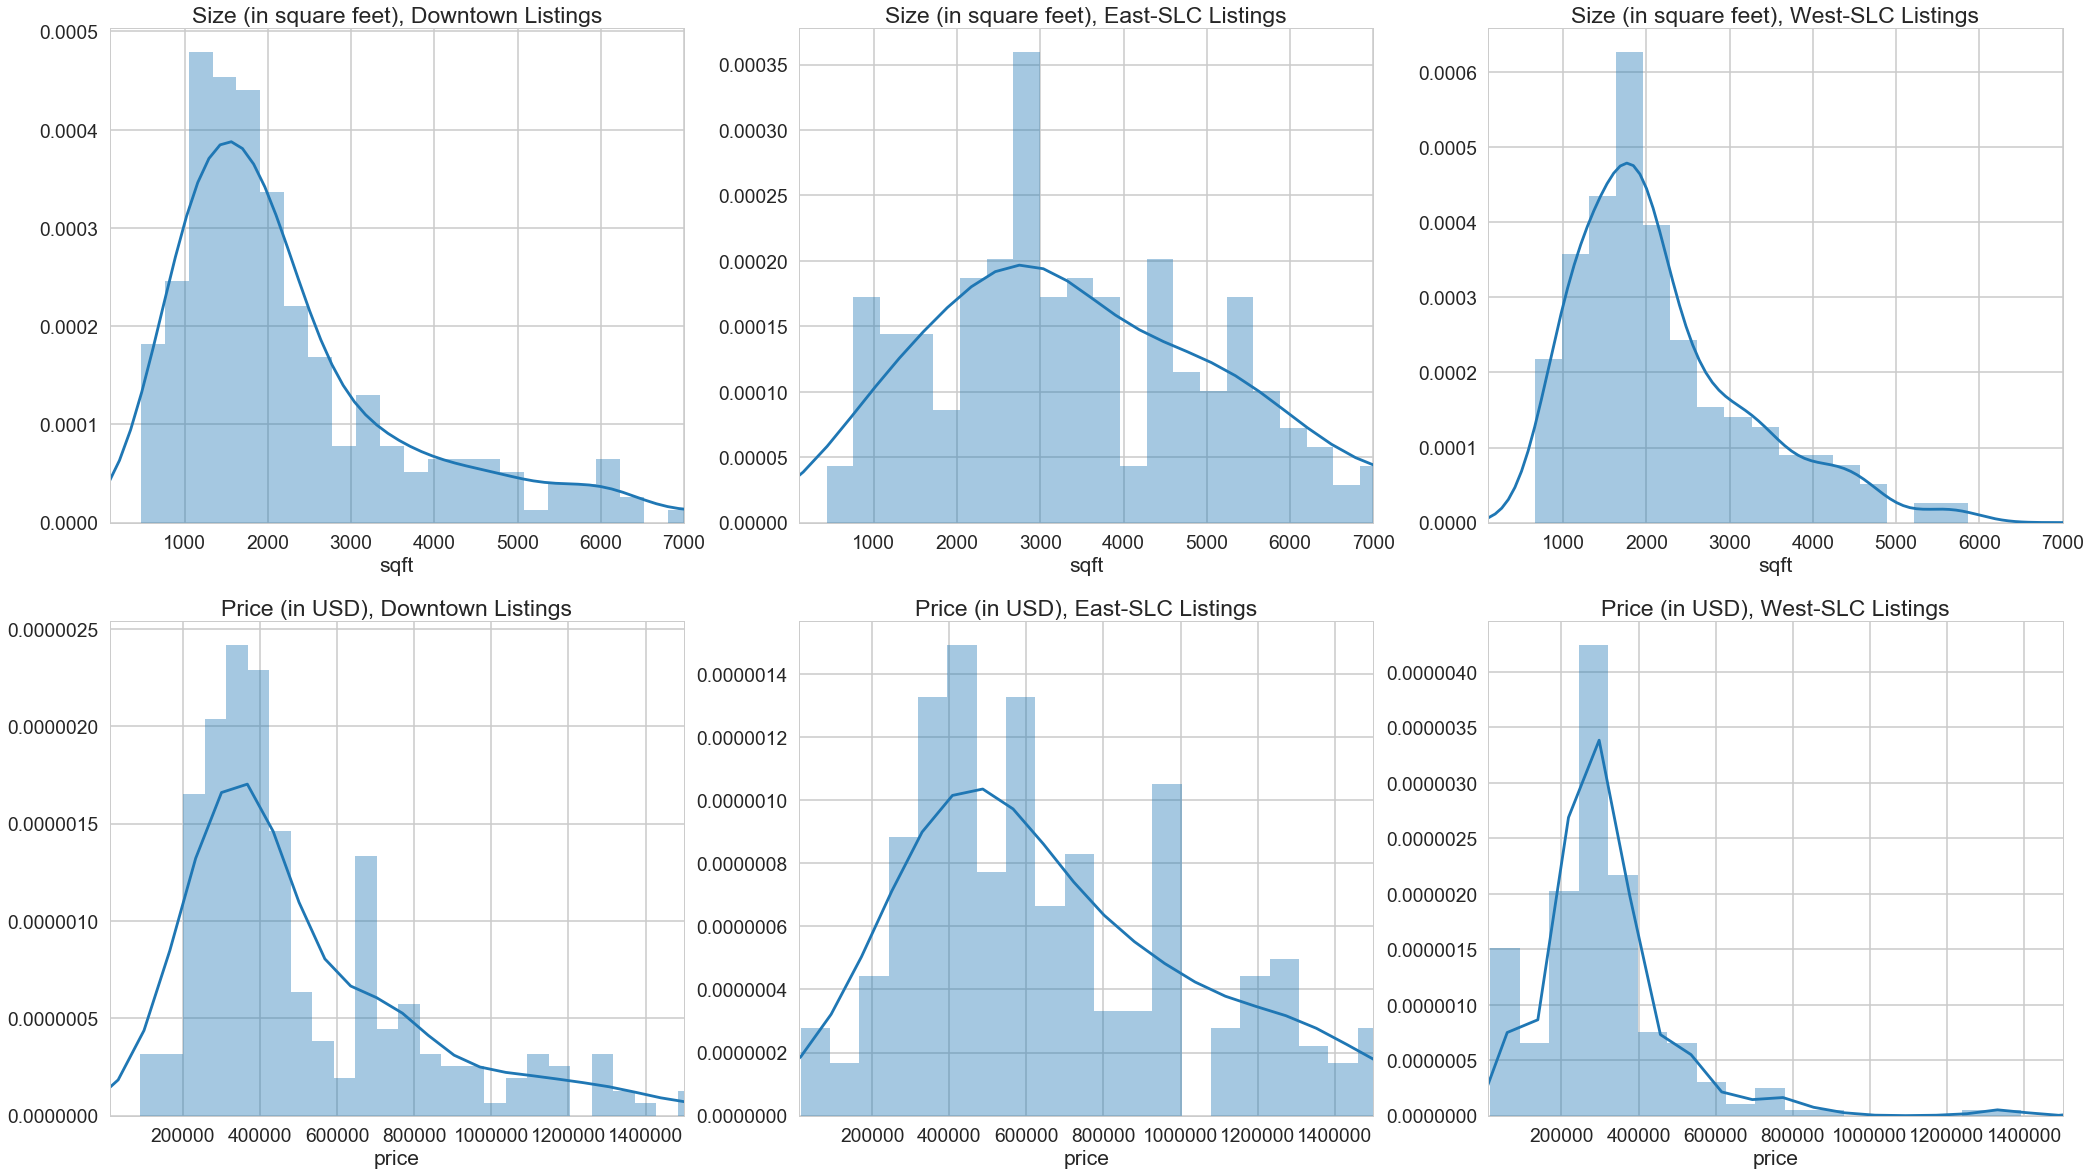

In [6]:
# making data frame with null sqft listings removed
listings_sqft_included = slc_active_listings[np.isnan(slc_active_listings.price_per_sqft)==False]

# plotting the sqft across west, east, and downtown neighborhoods

fig = plt.figure(figsize=[35, 20])
sns.set_context("poster", font_scale=1.2)
sns.set_style("whitegrid")

x = .5
lower_size = 100
upper_size = 7000

fig.add_subplot(231)   #top left
plot1 =listings_sqft_included[listings_sqft_included['region']=='Downtown-SLC']['sqft']
sns.distplot(plot1, bins = 50, 
             kde=True).set_title('Size (in square feet), Downtown Listings')
plt.xlim(lower_size, upper_size)


fig.add_subplot(232)   #top right
plot2 =listings_sqft_included[listings_sqft_included['region']=='East-SLC']['sqft']
sns.distplot(plot2, bins = 100 , 
             kde=True).set_title('Size (in square feet), East-SLC Listings')
plt.xlim(lower_size, upper_size)


fig.add_subplot(233)   #top right
plot3 =listings_sqft_included[listings_sqft_included['region']=='West-SLC']['sqft']
sns.distplot(plot3, bins = 25 , 
             kde=True).set_title('Size (in square feet), West-SLC Listings')
plt.xlim(lower_size, upper_size)


lower_price = 10000
upper_price = 1500000

fig.add_subplot(234)   #top left
plot1 =slc_active_listings[slc_active_listings['region']=='Downtown-SLC']['price']
sns.distplot(plot1, bins = int(len(slc_active_listings[slc_active_listings['region']=='Downtown-SLC'])*x), 
             kde=True).set_title('Price (in USD), Downtown Listings')
plt.xlim(lower_price, upper_price)


fig.add_subplot(235)   #top right
plot2 =slc_active_listings[slc_active_listings['region']=='East-SLC']['price']
sns.distplot(plot2, bins = int(len(slc_active_listings[slc_active_listings['region']=='East-SLC'])*x) , 
             kde=True).set_title('Price (in USD), East-SLC Listings')
plt.xlim(lower_price, upper_price)


fig.add_subplot(236)   #top right
plot3 =slc_active_listings[slc_active_listings['region']=='West-SLC']['price']
sns.distplot(plot3, bins = int(len(slc_active_listings[slc_active_listings['region']=='West-SLC'])*x) , 
             kde=True).set_title('Price (in USD), West-SLC Listings')
plt.xlim(lower_price, upper_price)

plt.show()

Homes in Downtown-SLC (median size ~1880 sqft) and West-SLC (median size ~ 1920 sqft) skew smaller than those in East-SLC (median size ~3417 sqft). The West-SLC listings show a large number of listings less than 1500 sqft. The Zillow listing 'title' for these homes is 'Home For Sale' (rather than 'House For Sale'), which is curiously the Zillow euphemism for a trailer doublewide and accounts for the large number of very small, very cheap homes in West-SLC. The size distribution of East-SLC homes is broad, and the top quartile of homes is larger than 5244 sqft.

The price data shows a similar profile for the three geographic regions. Downtown-SLC and West-SLC listings show more tightly clustered price data than the wide spread East-SLC price data, thought the Downtown-SLC data does have a long right-tail. The median Downtown-SLC listing is \$422,000 (mean = \$738,608), the median East-SLC listing is \$617,450 (mean = \$928,387), and the median West-SLC is \$280,000 (mean = \$364,791).

## Now, small house or large house? Which is it?!?

After an initial exploration of the data, I dug into the small versus large comparisons.

#### Question 1. Are small homes more valuable (per square foot) than large homes?
To address this question, I plotted a bar graph of price per square foot for each of the home size_types (small, medium, and large).

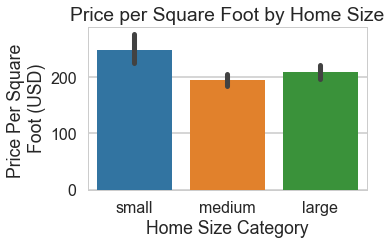

In [7]:
# plotting the price per sqft for the three categories of home_type

fig = plt.figure(figsize=[5, 3])
sns.set_context("poster", font_scale=1)
sns.set_style("whitegrid")

fig.add_subplot(111)   #top
sns.barplot(y="price_per_sqft", x="size_type", 
            data=slc_active_listings).set_title('Price per Square Foot by Home Size')
plt.xlabel("Home Size Category")
plt.ylabel("Price Per Square \nFoot (USD)")

plt.show()

In [8]:
slc_active_listings.groupby('size_type')['price_per_sqft'].describe()

,count,mean,std,min,25%,50%,75%,max
size_type,,,,,,,,
large,325.0,208.229477,115.912588,87.594502,137.468031,177.253866,237.859267,1267.880364
medium,290.0,194.467827,90.015279,21.200000,145.166402,179.154333,227.684105,868.902439
small,110.0,249.066788,136.738622,13.636364,168.582068,235.972096,338.888595,693.576389


The mean price per square foot for a home less than 1200 sqft ('small') is \$249, greater than that of either 'medium' sized homes (\$195) or 'large' homes (\$208). **Relative to their size, small homes are more valuable than large homes**. That was easy! Next I addressed geographic features in the small vs. large comparisons.

#### Question 2: Is a small home downtown really more valuable than a large home in the 'burbs?

I approached this question directly by plotting price per square foot for home size categories in the three geographic regions. The answer to Question 1 also made me curious about whether the 'small homes are more valuable' finding holds up for all neighborhoods, so I addressed this question here as well. 

In [9]:
slc_active_listings.groupby(['neighborhood', 'size_type'])['price_per_sqft'].describe()

count        mean         std         min         25%         50%         75%          max
neighborhood         size_type                                                                                            
Cottonwood           large       69.0  223.235125  161.558787  125.865743  149.624495  165.562914  219.418541  1267.880364
                     medium      11.0  215.017196   63.653654  144.957983  179.900618  191.885965  233.576577   380.476190
                     small       13.0  378.812370  130.544327  125.468165  341.995842  426.195426  473.737374   496.650718
Downtown SLC         large       91.0  260.034570  110.224642  127.186589  188.432408  234.268537  306.737528   760.619977
                     medium     120.0  246.057628  100.787614  142.084562  187.522305  226.593900  265.742494   868.902439
                     small       57.0  304.170499  102.100192  157.894737  233.848954  294.000000  352.011494   693.576389
Millcreek_Holladay   large       90.0  211.196738   87.778479  120.105422  155.665193  190.465488  233.547064   623.295455
                     medium      30.0  192.822013   77.212446   21.200000  159.926840  196.408849  224.698278   406.787330
                     small        4.0  192.426850  129.002205   16.666667  147.549020  215.544757  260.422587   321.951220
Murray               large       19.0  154.164868   36.055920  104.131944  127.293033  143.202904  190.208028   211.984172
                     medium      13.0  159.630788   60.343155   28.333333  152.882353  176.871795  205.479452   226.550681
                     small        7.0  174.029257   78.294770   22.796353  153.659148  198.905473  209.129786   270.925110
North SLC            large        5.0  137.433549   19.127687  108.665475  138.354727  138.436025  139.157325   162.554191
                     medium       8.0  201.350538   32.913193  152.784875  172.516924  211.366176  220.675180   243.655914
Taylorsville_Midvale large       10.0  124.597429   11.732808  103.206997  118.438823  125.128678  131.952071   143.476476
                     medium      27.0  133.244671   50.907507   41.507024  121.444145  139.062500  153.550114   299.238303
                     small        8.0   74.876930   55.932955   18.367347   28.588343   52.836538  128.940097   153.780069
West Valley          large       41.0  115.566576   15.692760   87.594502  109.255464  114.186955  120.277438   167.544040
                     medium      81.0  141.176471   40.203126   32.142857  130.319596  143.262987  156.035380   279.719697
                     small       21.0  121.339989   74.715898   13.636364   40.510204  150.369004  186.513995   228.472763

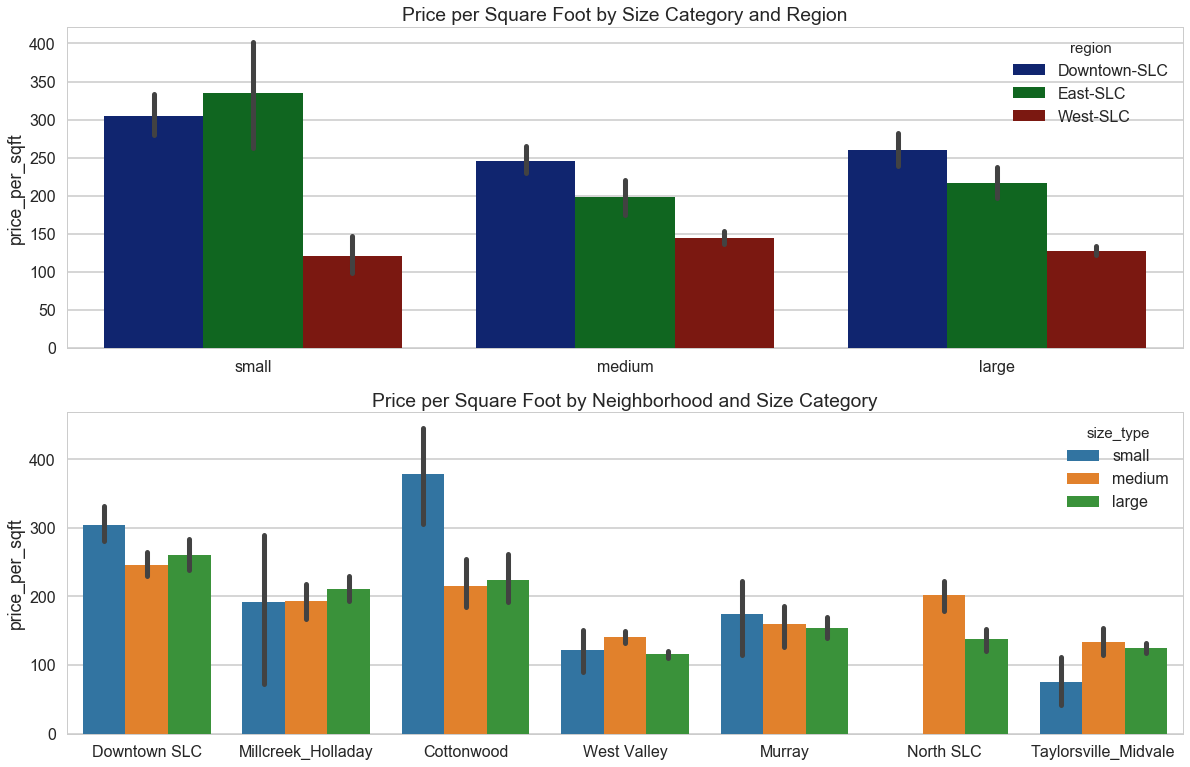

In [10]:
# plotting the price per sqft for the three categories of home_type by neighborhood and region

fig = plt.figure(figsize=[20, 13])
sns.set_context("poster", font_scale=1)
sns.set_style("whitegrid")

fig.add_subplot(212)   #bottom
sns.barplot(y="price_per_sqft", x="neighborhood", hue = 'size_type',
            data=slc_active_listings).set_title('Price per Square Foot by Neighborhood and Size Category')
plt.xlabel("")

fig.add_subplot(211)   #top
sns.barplot(y="price_per_sqft", x="size_type", hue = 'region', palette="dark",
            data=slc_active_listings).set_title('Price per Square Foot by Size Category and Region')
plt.xlabel("")

plt.show()

To strictly answer my question, **yes, a small home downtown is more valuable (relative to size) than a large house in the suburbs.** The median price per square foot for a small home in Downtown-SLC is \$304 while large homes in East-SLC and West-SLC are priced at \$216 and \$128, respectively. 

The neighborhood data surprised me, however, in that a small home in Downtown-SLC is *not* more valuable (per square foot) than a small home in a posh eastern suburb. In fact, the most valuable asset type in this data is a small home in the suburb of Cottonwood, with a median price per square foot of \$379. The 'small homes are more valuable' finding does not hold true for the other East-SLC suburbs nor for the West-SLC suburbs.

#### Question 3: Has the relative value of small urban homes increased more than that of large suburban homes?

The first two questions were straightforward, but this question is a bit more nuanced and required some pre-analysis processing. Since I don't have size data for the historic pricing time series, I wanted to confirm the use of bedroom count and as a proxy for square footage (size).

Additionally, I needed to address the differences in magnitude of the ZHVI for different types of homes (small-downtown, large-suburban, etc.). The ZHVI of a small home downtown may be lower in an absolute sense than the ZHVI of a large suburban home, but I'm interested in relative appreciation over time. To address this issue I used the preprocessing.MinMaxScaler() tool from sklearn to normalize each timeseries to the series maximum (scaled to 1) and minimum (scaled to 0).

The historic price data was processed using code in the 'Zillow_SLC_Historic_Data' notebook and saved to a csv file. To see the full processing code refer to the 'Zillow_SLC_Historic_Data' notebook. Due to limitations in the available data, only three neighborhoods will be considered in this analysis: Downtown SLC, Millcreek_Holladay (as a representative of East-SLC), and West Valley (as a representative of West-SLC).

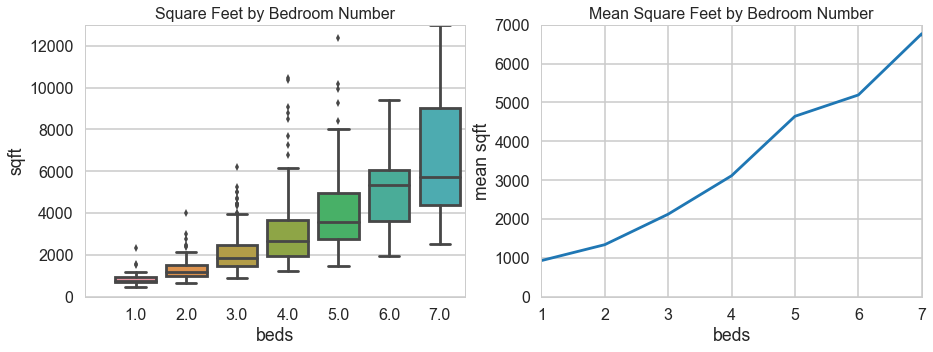

In [11]:
# plotting number of bedrooms vs square footage and mean square footage

#make the axes fonts bigger
sns.set_context("poster")
fig = plt.figure(figsize=[15, 5])

# line plot of mean sqft vs bedroom count

y=(slc_active_listings.groupby('beds')['sqft'].describe()).reset_index()['mean']
x=(slc_active_listings.groupby('beds')['sqft'].describe()).reset_index()['beds']

ax = fig.add_subplot(122)

plt.plot(x,y)
plt.ylabel('mean sqft')
plt.xlabel('beds')

plt.title('Mean Square Feet by Bedroom Number', y=1, fontsize=16)
plt.xlim(1, 7)
plt.ylim(0, 7000)


# box of sqft vs bedroom count
fig.add_subplot(121)   #left
sns.boxplot(x="beds", y="sqft", data=slc_active_listings)
plt.title('Square Feet by Bedroom Number', y=1, fontsize=16)
plt.xlim(-1, 6.5)
plt.ylim(0, 13000)

plt.show()

The above plots confirm that the number of bedrooms is closely associated with square footage. One and two bedroom properties usually fall below the 'small' category cutoff of 1200 sqft (median size is 759 and 1202 sqft, respectively), and homes with four or more bedrooms usually fall within the 'large' category cutoff of 2500+ sqft (median size is 2696 sqft). Thus, for this analysis 'small' homes will be classified as 1-2 bedrooms and 'large' will be classified as 4 or more bedrooms.

I began by plotting the relative ZHVI values for comparable home types in the three geographic regions. Note that the data for 1-bedroom homes in East-SLC and West-SLC is incomplete and inconsistent (likely due to too little data for the ZHVI machine learning model), so I omitted these data from this discussion. 

In [12]:
# importing the cleaned and parsed csv with historic pricing data

slc_historic_pricing = pd.read_csv('~/Desktop/K2_DataScience/K2_Project2/zillow_analysis_notebooks/zillow_slc_historic_prices_processed.csv', 
                           sep=',', index_col=0)

# converting the year-month string to a date time object

slc_historic_pricing['year_month'] = pd.to_datetime(slc_historic_pricing['year_month'], format='%Y-%m', errors='coerce').dropna()


In [13]:
import warnings
warnings.filterwarnings('ignore')

# data needs to be separated into home type categories and normalized to individual min/max
# to address different magnitudes of ZHVI range

min_max_scaler = preprocessing.MinMaxScaler()

# scaling downtown historic pricing data
one_bed_downtown = slc_historic_pricing[(slc_historic_pricing['neighborhood'] == 'Downtown SLC')
                               &(slc_historic_pricing['beds'] == 1)].dropna(axis=0, how='any')
two_bed_downtown = slc_historic_pricing[(slc_historic_pricing['neighborhood'] == 'Downtown SLC')
                               &(slc_historic_pricing['beds'] == 2)].dropna(axis=0, how='any')
three_bed_downtown = slc_historic_pricing[(slc_historic_pricing['neighborhood'] == 'Downtown SLC')
                               &(slc_historic_pricing['beds'] == 3)].dropna(axis=0, how='any')
four_bed_downtown = slc_historic_pricing[(slc_historic_pricing['neighborhood'] == 'Downtown SLC')
                               &(slc_historic_pricing['beds'] == 4)].dropna(axis=0, how='any')
five_bed_downtown = slc_historic_pricing[(slc_historic_pricing['neighborhood'] == 'Downtown SLC')
                               &(slc_historic_pricing['beds'] == 5)].dropna(axis=0, how='any')

one_bed_downtown = one_bed_downtown.groupby('year_month')['price'].mean()
one_bed_downtown_norm = pd.DataFrame(min_max_scaler.fit_transform(one_bed_downtown))

two_bed_downtown = two_bed_downtown.groupby('year_month')['price'].mean()
two_bed_downtown_norm = pd.DataFrame(min_max_scaler.fit_transform(two_bed_downtown))

three_bed_downtown = three_bed_downtown.groupby('year_month')['price'].mean()
three_bed_downtown_norm = pd.DataFrame(min_max_scaler.fit_transform(three_bed_downtown))

four_bed_downtown = four_bed_downtown.groupby('year_month')['price'].mean()
four_bed_downtown_norm = pd.DataFrame(min_max_scaler.fit_transform(four_bed_downtown))

five_bed_downtown = five_bed_downtown.groupby('year_month')['price'].mean()
five_bed_downtown_norm = pd.DataFrame(min_max_scaler.fit_transform(five_bed_downtown))


# scaling median of all east side data
one_bed_millcreek_holladay = slc_historic_pricing[(slc_historic_pricing['neighborhood'] == 'Millcreek_Holladay')
                               &(slc_historic_pricing['beds'] == 1)].dropna(axis=0, how='any')
two_bed_millcreek_holladay = slc_historic_pricing[(slc_historic_pricing['neighborhood'] == 'Millcreek_Holladay')
                               &(slc_historic_pricing['beds'] == 2)].dropna(axis=0, how='any')
three_bed_millcreek_holladay = slc_historic_pricing[(slc_historic_pricing['neighborhood'] == 'Millcreek_Holladay')
                               &(slc_historic_pricing['beds'] == 3)].dropna(axis=0, how='any')
four_bed_millcreek_holladay = slc_historic_pricing[(slc_historic_pricing['neighborhood'] == 'Millcreek_Holladay')
                               &(slc_historic_pricing['beds'] == 4)].dropna(axis=0, how='any')
five_bed_millcreek_holladay = slc_historic_pricing[(slc_historic_pricing['neighborhood'] == 'Millcreek_Holladay')
                               &(slc_historic_pricing['beds'] == 5)].dropna(axis=0, how='any')

one_bed_millcreek_holladay = one_bed_millcreek_holladay.groupby('year_month')['price'].mean()
one_bed_millcreek_holladay_norm = pd.DataFrame(min_max_scaler.fit_transform(one_bed_millcreek_holladay))

two_bed_millcreek_holladay = two_bed_millcreek_holladay.groupby('year_month')['price'].mean()
two_bed_millcreek_holladay_norm = pd.DataFrame(min_max_scaler.fit_transform(two_bed_millcreek_holladay))

three_bed_millcreek_holladay = three_bed_millcreek_holladay.groupby('year_month')['price'].mean()
three_bed_millcreek_holladay_norm = pd.DataFrame(min_max_scaler.fit_transform(three_bed_millcreek_holladay))

four_bed_millcreek_holladay = four_bed_millcreek_holladay.groupby('year_month')['price'].mean()
four_bed_millcreek_holladay_norm = pd.DataFrame(min_max_scaler.fit_transform(four_bed_millcreek_holladay))

five_bed_millcreek_holladay = five_bed_millcreek_holladay.groupby('year_month')['price'].mean()
five_bed_millcreek_holladay_norm = pd.DataFrame(min_max_scaler.fit_transform(five_bed_millcreek_holladay))

# scaling median of all west side data
one_bed_west_valley = slc_historic_pricing[(slc_historic_pricing['neighborhood'] == 'West Valley')
                               &(slc_historic_pricing['beds'] == 1)].dropna(axis=0, how='any')
two_bed_west_valley = slc_historic_pricing[(slc_historic_pricing['neighborhood'] == 'West Valley')
                               &(slc_historic_pricing['beds'] == 2)].dropna(axis=0, how='any')
three_bed_west_valley = slc_historic_pricing[(slc_historic_pricing['neighborhood'] == 'West Valley')
                               &(slc_historic_pricing['beds'] == 3)].dropna(axis=0, how='any')
four_bed_west_valley = slc_historic_pricing[(slc_historic_pricing['neighborhood'] == 'West Valley')
                               &(slc_historic_pricing['beds'] == 4)].dropna(axis=0, how='any')
five_bed_west_valley = slc_historic_pricing[(slc_historic_pricing['neighborhood'] == 'West Valley')
                               &(slc_historic_pricing['beds'] == 5)].dropna(axis=0, how='any')

one_bed_west_valley = one_bed_west_valley.groupby('year_month')['price'].mean()
one_bed_west_valley_norm = pd.DataFrame(min_max_scaler.fit_transform(one_bed_west_valley))

two_bed_west_valley = two_bed_west_valley.groupby('year_month')['price'].mean()
two_bed_west_valley_norm = pd.DataFrame(min_max_scaler.fit_transform(two_bed_west_valley))

three_bed_west_valley = three_bed_west_valley.groupby('year_month')['price'].mean()
three_bed_west_valley_norm = pd.DataFrame(min_max_scaler.fit_transform(three_bed_west_valley))

four_bed_west_valley = four_bed_west_valley.groupby('year_month')['price'].mean()
four_bed_west_valley_norm = pd.DataFrame(min_max_scaler.fit_transform(four_bed_west_valley))

five_bed_west_valley = five_bed_west_valley.groupby('year_month')['price'].mean()
five_bed_west_valley_norm = pd.DataFrame(min_max_scaler.fit_transform(five_bed_west_valley))

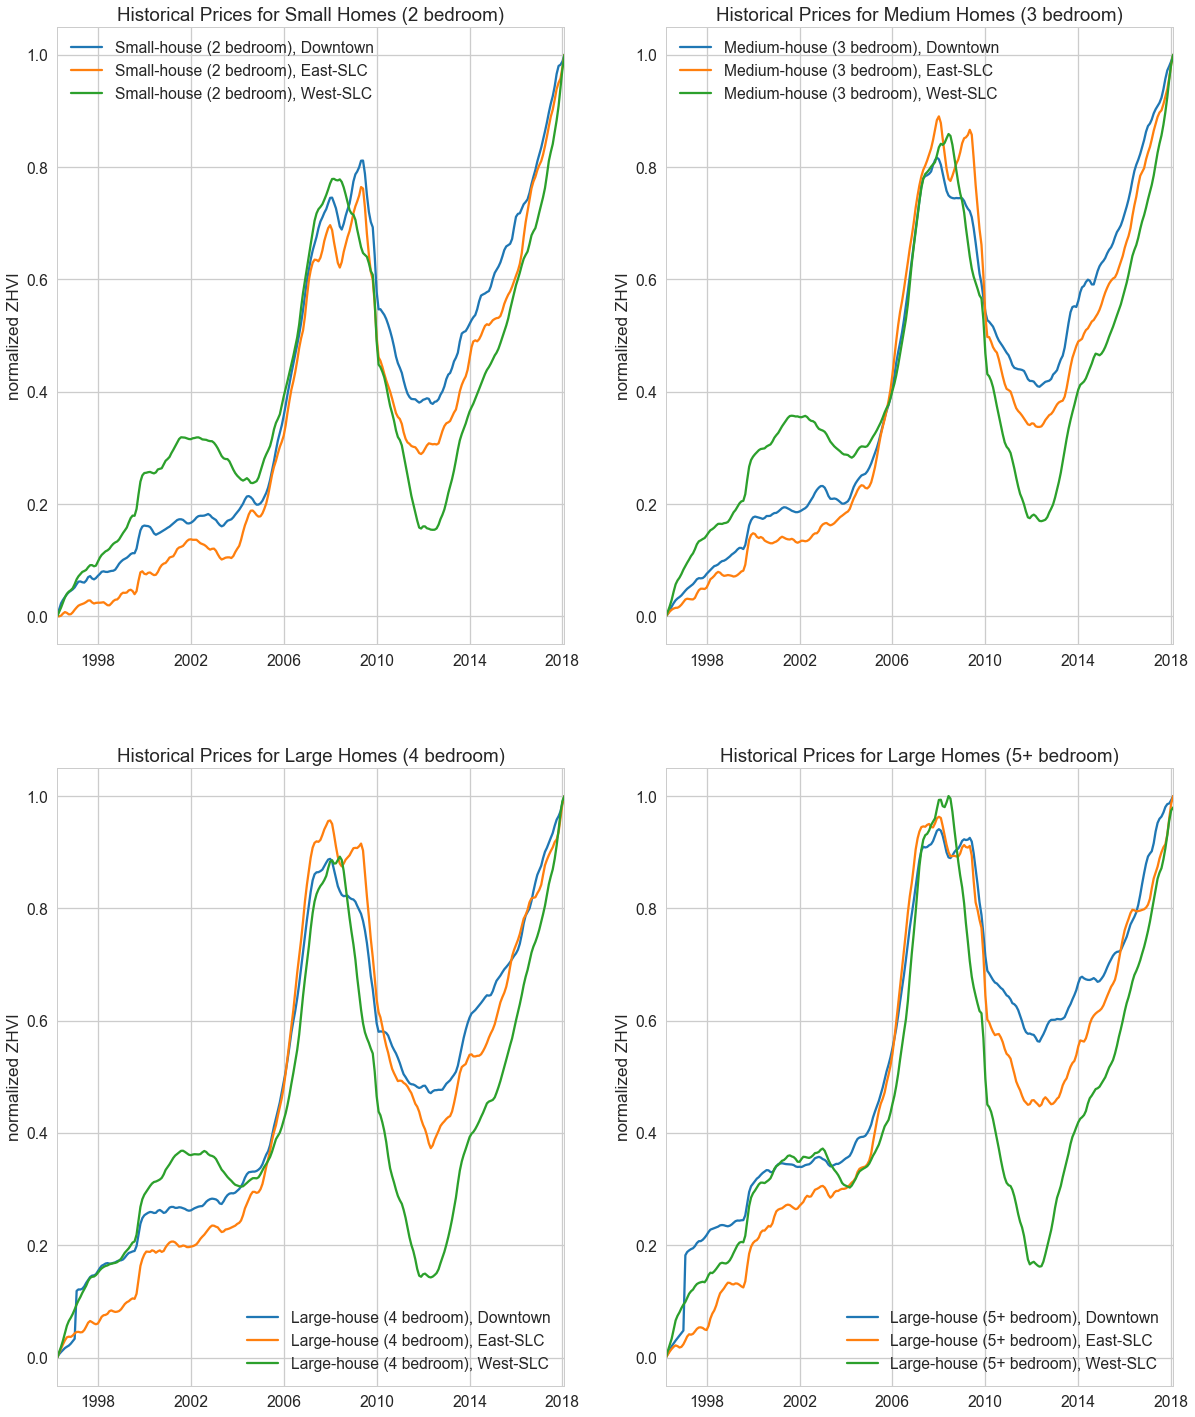

In [14]:
# plot normalized historic SLC pricing timeseries by bedroom number - DATA NORMALIZED

#make the axes fonts bigger
sns.set_context("talk", font_scale=1.2)
sns.set_style("whitegrid")
fig = plt.figure(figsize=[20, 25])
start_date = '1996-04-01 00:00:00'
end_date = '2018-02-01 00:00:00'

# first plot (I hid this data since it is incomplete)
#fig.add_subplot(321)   
#plt.plot(one_bed_downtown.index,one_bed_downtown_norm, 
         #label='Small-house (1 bedroom), Downtown')
#plt.plot(one_bed_millcreek_holladay.index,one_bed_millcreek_holladay_norm, 
         #label='Small-house (1 bedroom), East-SLC')
#plt.plot(one_bed_west_valley.index,one_bed_west_valley_norm, 
         #label='Small-house (1 bedroom), West-SLC')
#plt.legend()
#plt.ylabel('normalized ZHVI')
#plt.title('Historical Prices for Small Homes (1 bedroom)')
#plt.xlim(start_date, end_date)

# second plot
fig.add_subplot(221)   
plt.plot(two_bed_downtown.index,two_bed_downtown_norm, 
         label='Small-house (2 bedroom), Downtown')
plt.plot(two_bed_millcreek_holladay.index,two_bed_millcreek_holladay_norm, 
         label='Small-house (2 bedroom), East-SLC')
plt.plot(two_bed_west_valley.index,two_bed_west_valley_norm, 
         label='Small-house (2 bedroom), West-SLC')
plt.legend()
plt.ylabel('normalized ZHVI')
plt.title('Historical Prices for Small Homes (2 bedroom)')
plt.xlim(start_date, end_date)

# third plot
fig.add_subplot(222)   
plt.plot(three_bed_downtown.index,three_bed_downtown_norm, 
         label='Medium-house (3 bedroom), Downtown')
plt.plot(three_bed_millcreek_holladay.index,three_bed_millcreek_holladay_norm, 
         label='Medium-house (3 bedroom), East-SLC')
plt.plot(three_bed_west_valley.index,three_bed_west_valley_norm, 
         label='Medium-house (3 bedroom), West-SLC')
plt.legend()
plt.ylabel('normalized ZHVI')
plt.title('Historical Prices for Medium Homes (3 bedroom)')
plt.xlim(start_date, end_date)

# fourth plot
fig.add_subplot(223)   
plt.plot(four_bed_downtown.index,four_bed_downtown_norm, 
         label='Large-house (4 bedroom), Downtown')
plt.plot(four_bed_millcreek_holladay.index,four_bed_millcreek_holladay_norm, 
         label='Large-house (4 bedroom), East-SLC')
plt.plot(four_bed_west_valley.index,four_bed_west_valley_norm, 
         label='Large-house (4 bedroom), West-SLC')
plt.legend()
plt.ylabel('normalized ZHVI')
plt.title('Historical Prices for Large Homes (4 bedroom)')
plt.xlim(start_date, end_date)

# five plot
fig.add_subplot(224)   
plt.plot(five_bed_downtown.index,five_bed_downtown_norm, 
         label='Large-house (5+ bedroom), Downtown')
plt.plot(five_bed_millcreek_holladay.index,five_bed_millcreek_holladay_norm, 
         label='Large-house (5+ bedroom), East-SLC')
plt.plot(five_bed_west_valley.index,five_bed_west_valley_norm, 
         label='Large-house (5+ bedroom), West-SLC')
plt.legend()
plt.ylabel('normalized ZHVI')
plt.title('Historical Prices for Large Homes (5+ bedroom)')
plt.xlim(start_date, end_date)

plt.show()

Relative to the start of the time series in 1996, properties in all 3 geographic regions appreciated largely in parallel. Small and medium homes in West-SLC appreciated more rapidly between 1996 and 2004, possibly due to being especially depressed at the start of the time series. 

During the housing ‘boom’ of 2006-2009, the 3 geographic regions exhibited similar magnitudes of ZHVI appreciation. During the economic downturn between 2009 and 2012, however, the magnitude of ZHVI decline for each region differed. West-SLC properties of all sizes depreciated more than properties in the other regions, and large homes in West-SLC depreciated the most. In contrast, Downtown-SLC properties of all sizes depreciated less than properties in the other regions, and large homes in Downtown-SLC depreciated the least.

During the current market recovery (2013 to present), all property types in all regions are experiencing ZHVI appreciation, with Downtown-SLC properties of all sizes increasing slightly more than properties in other regions.

After exploring the comparable data, I plotted normalized ZHVI for small homes downtown versus large homes in each of the two suburban regions.

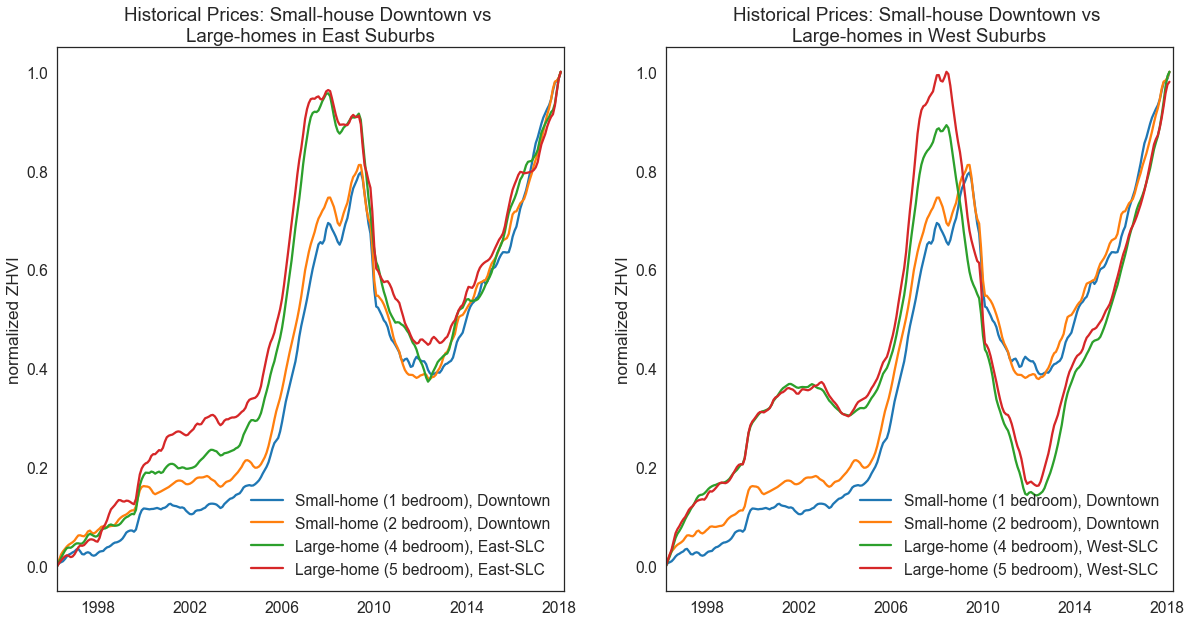

In [15]:
#plot normalized historic SLC pricing data by home size - DATA NORMALIZED

#make the axes fonts bigger
sns.set_context("talk", font_scale=1.2)
sns.set_style("white")
fig = plt.figure(figsize=[20,10])
start_date = '1996-04-01 00:00:00'
end_date = '2018-04-01 00:00:00'

# first plot
fig.add_subplot(121)   
plt.plot(one_bed_downtown.index,one_bed_downtown_norm, label='Small-home (1 bedroom), Downtown')
plt.plot(two_bed_downtown.index,two_bed_downtown_norm, label='Small-home (2 bedroom), Downtown')
plt.plot(four_bed_millcreek_holladay.index,four_bed_millcreek_holladay_norm, label='Large-home (4 bedroom), East-SLC')
plt.plot(five_bed_millcreek_holladay.index,five_bed_millcreek_holladay_norm, label='Large-home (5 bedroom), East-SLC')
plt.legend()
plt.ylabel('normalized ZHVI')
plt.title('Historical Prices: Small-house Downtown vs \nLarge-homes in East Suburbs')
plt.xlim(start_date, end_date)

# second plot
fig.add_subplot(122)   
plt.plot(one_bed_downtown.index,one_bed_downtown_norm, label='Small-home (1 bedroom), Downtown')
plt.plot(two_bed_downtown.index,two_bed_downtown_norm, label='Small-home (2 bedroom), Downtown')
plt.plot(four_bed_west_valley.index,four_bed_west_valley_norm, label='Large-home (4 bedroom), West-SLC')
plt.plot(five_bed_west_valley.index,five_bed_west_valley_norm, label='Large-home (5 bedroom), West-SLC')
plt.legend()
plt.ylabel('normalized ZHVI')
plt.title('Historical Prices: Small-house Downtown vs \nLarge-homes in West Suburbs')
plt.xlim(start_date, end_date)


plt.show()

The plots above tell a complex story, but in short owning a large home in a fancy suburb is actually better than owning a small home downtown, but owning a small home downtown is usually better than owning a large home in a less desirable suburb.

Relative to large homes in both suburban regions, small homes downtown did not appreciate as dramatically during the 2006-2009 boom. During the economic downturn in 2009, however, urban small homes maintained their value as well as large homes in suburban East-SLC and much better than large homes in suburban West-SLC.

It is noteworthy that in this current market upswing (2013 to present) the ZHVI appreciation of small urban homes is catching up to that of large suburban homes. The 2018 data shows small homes at their highest valuation since 1996, while large suburban homes are appreciated to roughly the same valuation as during the 2006-2009 bubble.

Back to our original question: is it better to own a small home downtown than a large home in the suburbs? The answer depends on the specific suburb and the market trajectory, but in the context of Salt Lake City and the current market boom I will give this question a **highly unsatisfying 'probably'**. Small urban homes are likely a better investment than large suburban homes, with the highest appreciation values since 1996 and a high likelihood of maintaining value well in the next downturn.

## Summary

* Are small homes more valuable (per square foot) than large homes?
    
    **Yes.**
    
    
* Is a small home downtown really more valuable than a large home in the 'burbs? 
    
    **Yes, but surprisingly a small home in a fancy suburb is worth more!**


* Has the relative value of small urban homes increased more rapidly than that of larger suburban homes?
    
    **Not in previous real estate bubbles, but in the current market small urban homes have appreciated to their 
    highest value since 1996. Additionally, price behavior in past downturns indicate that small urban homes
    maintain their value as well or better than other property types during market corrections.** 
    

These findings are mixed for the small house people. Small urban homes do hold their value well and in the current market are appreciating quickly, but for prospective buyers small homes come with a high price per square foot. I am satisfied that small urban homes are a stable investment, but I suppose I'll have to keep an open mind about Salt Lake City's eastern suburbs.

## Limitations and Further Exploration

One of the major limitations of this analysis comes from the nature of the price data. The active listing price is not the actual sale price, which could be lower. Similarly the ZHVI in the historical data is not an actual sale price, but is partially derived from past sales. Ultimately, obtaining the actual price from recent and historical transactions would be a more robust method of determining valuation. In California this information is available publically, but most states (including Utah) don't make this information public. 

Another limitation in the data is the incompleteness of the historical data. The data was not available for all of the Salt Lake City ZIP codes of interest (like the Cottonwood suburb), leaving some ambiguity in the historical price data and making it difficult to compare directly to the current listing data.

There is room for a good deal of expansion with this analysis. Though the historical price data was normalized, the actual year-over-year rate of change was not calculated. An interesting future analysis would be to calculate the rate of value change each year and identify regions and home types with notable trajectories. Further home type categories could be added to this exploration, and category classifiers could include condo/ single family, the age of the home, the lot size, and neighborhood demographic features.